In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

I am going to use data from [ourworldindata.org](ourworldindata.org). Specifically, I will be using data on government spending which can be found [here](https://ourworldindata.org/government-spending#recent-data-on-the-size-of-governments).

In [2]:
gov_spend = pd.read_csv('total-gov-expenditure-gdp-wdi.csv')

I am going to pick locations in the dataset to explore it a bit.

In [3]:
gov_spend.iloc[4150:4160,]

,Entity,Code,Year,(% of GDP)
4150,United States,USA,2014,22.936316
4151,United States,USA,2015,22.755974
4152,United States,USA,2016,22.880457
4153,Uruguay,URY,1972,24.952676
4154,Uruguay,URY,1973,15.921130
4155,Uruguay,URY,1974,21.925919
4156,Uruguay,URY,1975,22.512957
4157,Uruguay,URY,1976,22.929947
4158,Uruguay,URY,1977,21.820654
4159,Uruguay,URY,1978,21.470038


In [4]:
gov_spend.groupby('Code').count()

,Entity,Year,(% of GDP)
Code,,,
AFG,8,8,8
AGO,17,17,17
ALB,12,12,12
ARE,8,8,8
ARG,16,16,16
ARM,11,11,11
ATG,15,15,15
AUS,44,44,44
AUT,44,44,44


I am going to extract the USA, UK and South Africa data to create more manageable datasets for this task.

In [17]:
usa_spend = gov_spend[gov_spend['Code'] == 'USA']
print(usa_spend)

             Entity Code  Year   (% of GDP)
4108  United States  USA  1972    17.751973
4109  United States  USA  1973    17.856580
4110  United States  USA  1974    17.841267
4111  United States  USA  1975    19.424213
4112  United States  USA  1976    19.688568
4113  United States  USA  1977    19.564218
4114  United States  USA  1978    19.083236
4115  United States  USA  1979    18.886512
4116  United States  USA  1980    20.506864
4117  United States  USA  1981    20.979110
4118  United States  USA  1982    22.455068
4119  United States  USA  1983    22.777042
4120  United States  USA  1984    21.453993
4121  United States  USA  1985    22.135240
4122  United States  USA  1986    22.179643
4123  United States  USA  1987    21.308496
4124  United States  USA  1988    20.965501
4125  United States  USA  1989    20.803709
4126  United States  USA  1990    21.499638
4127  United States  USA  1991    22.825400
4128  United States  USA  1992    21.755084
4129  United States  USA  1993  

I was having some trouble plotting the final column - I thought I had to escape the special characters but the below has showed me there was a secret space!

In [6]:
print(usa_spend.columns)

Index(['Entity', 'Code', 'Year', ' (% of GDP)'], dtype='object')


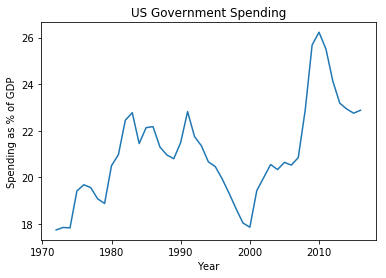

In [7]:
plt.plot(usa_spend['Year'],usa_spend[' (% of GDP)'])
plt.title("US Government Spending")
plt.xlabel("Year")
plt.ylabel("Spending as % of GDP")
plt.show()

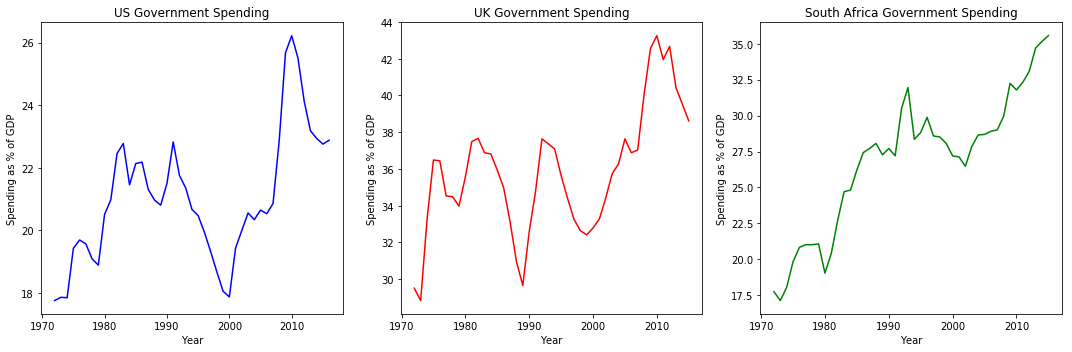

In [8]:
uk_spend = gov_spend.loc[gov_spend['Code'] == 'GBR',]
sa_spend = gov_spend.loc[gov_spend['Code'] == 'ZAF',]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(usa_spend['Year'], usa_spend[' (% of GDP)'], color = 'blue')
plt.title("US Government Spending")
plt.xlabel("Year")
plt.ylabel("Spending as % of GDP")

plt.subplot(1, 3, 2)
plt.plot(uk_spend['Year'], uk_spend[' (% of GDP)'], color = 'red')
plt.title("UK Government Spending")
plt.xlabel("Year")
plt.ylabel("Spending as % of GDP")

plt.subplot(1, 3, 3)
plt.plot(sa_spend['Year'], sa_spend[' (% of GDP)'], color = 'green')
plt.title("South Africa Government Spending")
plt.xlabel("Year")
plt.ylabel("Spending as % of GDP")

plt.tight_layout()
plt.show()

We can see from these subplots that the US and UK governments have followed similar trends in government spending since the mid 1990s. Spending dipped for both countries as a % of GDP , bottoming out around 2000, before growing until around 2009/2010, when it started to tail off again. South Africa has experienced a similar trend, but the dip in the 1990s was not so pronounced, and no peak was reached around 2010. 

These graphs are good for comparing the general shapes of the data but not their relative sizes - the scales on the y axes are very different. For example, the top level of US government spending as a % of GDP was lower than the lowest point of the UK government spending as a % of GDP.

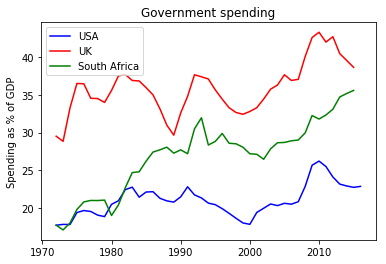

In [9]:
plt.plot(usa_spend['Year'], usa_spend[' (% of GDP)'], color = 'blue')
plt.plot(uk_spend['Year'], uk_spend[' (% of GDP)'], color = 'red')
plt.plot(sa_spend['Year'], sa_spend[' (% of GDP)'], color = 'green')
plt.title("Government spending")
plt.ylabel("Spending as % of GDP")
plt.legend(("USA", 'UK', "South Africa"))
plt.show()

This plot shows the relative levels of spending in each country compared to the other countries quite clearly. The UK government spends the most at all times as a % of GDP out of the three countries. The USA and South Africa started off at a similar level in 1972, but the percentage has increased much more in South Africa compared to the USA, reaching around 35% in about 2015 compared to around 22% in the USA. However, it is harder to compare the general shapes and trends of the spending on this graph compared to the subplots because the effects took place on different scales for each country.

In [10]:
yr_2000_spend = gov_spend.loc[gov_spend['Year'] == 2000,]

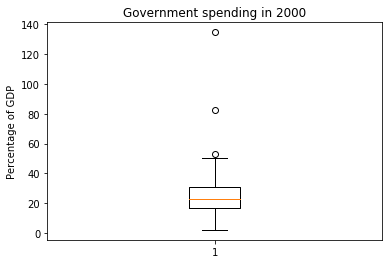

In [11]:
plt.boxplot(yr_2000_spend[' (% of GDP)'])
plt.title("Government spending in 2000")
plt.ylabel("Percentage of GDP")
plt.show()

Most countries' government spending as a % of GDP in 2000 was around 20%. There are two, maybe three, countries which look to be significant outliers, spending over 50% of GDP. I will remove the top two countries before plotting the histogram to get a better look at the distribution.

In [12]:
yr_2000_spend_under_60 = yr_2000_spend.loc[yr_2000_spend[' (% of GDP)'] < 60,]

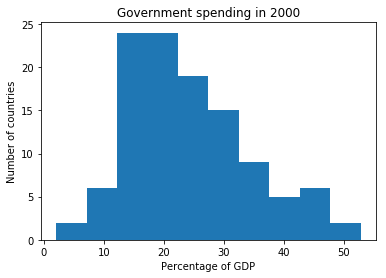

In [13]:
plt.hist(yr_2000_spend_under_60[' (% of GDP)'])
plt.title("Government spending in 2000")
plt.xlabel("Percentage of GDP")
plt.ylabel("Number of countries")
plt.show()

The histogram shows the distribution of government spending as a percentage of GDP. It is clearer from the histogram, compared to the boxplot, that the distribution is skewed.

In [20]:
yr_2010_spend = gov_spend[gov_spend['Year'] == 2010]
print(yr_2010_spend)

                                          Entity      Code  Year   (% of GDP)
4                                    Afghanistan       AFG  2010    50.607292
36                                       Algeria       DZA  2010    24.470536
49                                        Angola       AGO  2010    26.062375
65                           Antigua and Barbuda       ATG  2010    21.817794
92                                       Armenia       ARM  2010    22.997362
135                                    Australia       AUS  2010    26.775403
179                                      Austria       AUT  2010    46.622355
193                                   Azerbaijan       AZE  2010    20.872483
235                                      Bahamas       BHS  2010    17.657876
261                                      Bahrain       BHR  2010    19.467553
273                                   Bangladesh       BGD  2010     9.266251
286                                     Barbados       BRB  2010

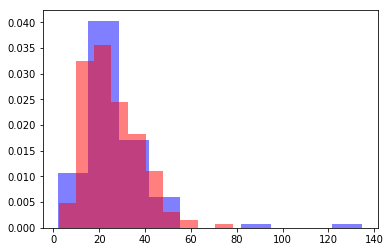

In [24]:
plt.hist(yr_2000_spend[' (% of GDP)'], density=True, color='blue', alpha = .5)
plt.hist(yr_2010_spend[' (% of GDP)'], density=True, color='red', alpha = .5)
plt.show()

In [25]:
yr_2010_spend_under_60 = yr_2010_spend.loc[yr_2010_spend[' (% of GDP)'] < 60, ]

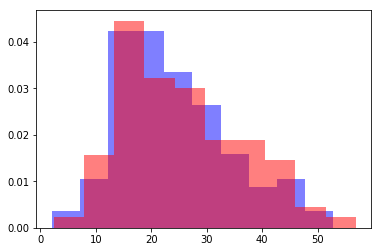

In [26]:
plt.hist(yr_2000_spend_under_60[' (% of GDP)'], density=True, color='blue', alpha=.5)
plt.hist(yr_2010_spend_under_60[' (% of GDP)'], density=True, color='red', alpha=.5)
plt.show()